In [146]:
import pandas as pd
import requests
from io import BytesIO
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
import numpy as np
import json
import math

In [147]:
url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
s=requests.get(url).content
confirmed = pd.read_csv(BytesIO(s))

In [148]:
url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"
s=requests.get(url).content
deaths = pd.read_csv(BytesIO(s))

In [149]:
url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"
s=requests.get(url).content
recovered = pd.read_csv(BytesIO(s))

In [150]:
OFFSET = 100

In [151]:
def by_country(df):
    return df.drop(columns=['Province/State', 'Lat', 'Long']).groupby('Country/Region').sum().sort_values([df.columns.tolist()[-1]], ascending=False)

confirmed_country = by_country(confirmed)
deaths_country = by_country(deaths)
recovered_country = by_country(recovered)

In [152]:
# Fix 2020-03-12, see https://github.com/CSSEGISandData/COVID-19/issues/599
# Italy: 15113 confirmed cases, 1016 death and 1258 recovered
confirmed_country['3/12/20']['Italy'] = 15113
deaths_country['3/12/20']['Italy'] = 1016
recovered_country['3/12/20']['Italy'] = 1258

#confirmed_country['3/19/20'] = np.zeros((len(confirmed_country.index),), dtype=int)
#deaths_country['3/19/20'] = np.zeros((len(confirmed_country.index),), dtype=int)
#recovered_country['3/19/20'] = np.zeros((len(confirmed_country.index),), dtype=int)

#confirmed_country['3/19/20']['Italy'] = 41035
#deaths_country['3/19/20']['Italy'] = 3405
#recovered_country['3/19/20']['Italy'] = 4440

#confirmed_country['3/19/20']['Germany'] = 15320
#deaths_country['3/19/20']['Germany'] = 44
#recovered_country['3/19/20']['Germany'] = 113

/usr/local/envs/py3env/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/envs/py3env/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/envs/py3env/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [153]:
confirmed_country.head(20)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,...,80977,81003,81033,81058,81102,81156,81250,81305,81397,81439.0
Italy,0,0,0,0,0,0,0,0,0,2,...,21157,24747,27980,31506,35713,41035,47021,53578,59138,59138.0
US,1,1,2,2,5,5,5,5,5,7,...,2727,3499,4632,6421,7783,13677,19100,25489,33272,33276.0
Spain,0,0,0,0,0,0,0,0,0,0,...,6391,7798,9942,11748,13910,17963,20410,25374,28768,28768.0
Germany,0,0,0,0,0,1,4,4,4,5,...,4585,5795,7272,9257,12327,15320,19848,22213,24873,24873.0
Iran,0,0,0,0,0,0,0,0,0,0,...,12729,13938,14991,16169,17361,18407,19644,20610,21638,21638.0
France,0,0,2,3,3,3,4,5,5,5,...,4487,4523,6668,7699,9105,10947,12726,14431,16176,16044.0
"Korea, South",1,1,2,2,3,4,4,4,4,11,...,8086,8162,8236,8320,8413,8565,8652,8799,8897,8897.0
Switzerland,0,0,0,0,0,0,0,0,0,0,...,1359,2200,2200,2700,3028,4075,5294,6575,7245,7245.0


In [154]:
active_country = confirmed_country.sub(deaths_country).sub(recovered_country).reindex(index=confirmed_country.index)
active_country.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
China,503,595,858,1325,1970,2737,5277,5834,7835,9375,...,12124,10783,9906,9030,8106,7372,6731,6189,5770,5351.0
Italy,0,0,0,0,0,0,0,0,0,2,...,17750,20603,23073,26062,28710,33190,38549,42681,46638,46638.0
US,1,1,2,2,5,5,5,5,5,7,...,2661,3424,4530,6296,7665,13477,18856,25182,32855,32681.0
Spain,0,0,0,0,0,0,0,0,0,0,...,5679,6992,9070,10187,12206,16026,17779,21874,24421,24421.0
Germany,0,0,0,0,0,1,4,4,4,5,...,4530,5738,7188,9166,12194,15163,19601,21896,24513,24513.0
Iran,0,0,0,0,0,0,0,0,0,0,...,9159,8624,9548,9792,10837,11413,11466,11419,12022,12022.0
France,0,0,2,3,3,3,4,5,5,5,...,4384,4420,6508,7539,8945,10692,12264,13857,13296,13170.0
"Korea, South",1,1,2,2,3,4,4,4,4,11,...,7504,7577,7024,6832,6789,6934,7018,7157,5884,5884.0
Switzerland,0,0,0,0,0,0,0,0,0,0,...,1342,2182,2182,2669,2985,4019,5225,6485,7016,7016.0


In [155]:
reduced_country = deaths_country.add(recovered_country).reindex(index=confirmed_country.index)
reduced_country.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
China,45,48,62,81,105,140,232,253,306,427,...,68853,70220,71127,72028,72996,73784,74519,75116,75627,76088.0
Italy,0,0,0,0,0,0,0,0,0,0,...,3407,4144,4907,5444,7003,7845,8472,10897,12500,12500.0
US,0,0,0,0,0,0,0,0,0,0,...,66,75,102,125,118,200,244,307,417,595.0
Spain,0,0,0,0,0,0,0,0,0,0,...,712,806,872,1561,1704,1937,2631,3500,4347,4347.0
Germany,0,0,0,0,0,0,0,0,0,0,...,55,57,84,91,133,157,247,317,360,360.0
Iran,0,0,0,0,0,0,0,0,0,0,...,3570,5314,5443,6377,6524,6994,8178,9191,9616,9616.0
France,0,0,0,0,0,0,0,0,0,0,...,103,103,160,160,160,255,462,574,2880,2874.0
"Korea, South",0,0,0,0,0,0,0,0,0,0,...,582,585,1212,1488,1624,1631,1634,1642,3013,3013.0
Switzerland,0,0,0,0,0,0,0,0,0,0,...,17,18,18,31,43,56,69,90,229,229.0


In [156]:
country = 'Germany'
pd.DataFrame(confirmed_country.loc[country]).tail(10)

,Germany
3/14/20,4585.0
3/15/20,5795.0
3/16/20,7272.0
3/17/20,9257.0
3/18/20,12327.0
3/19/20,15320.0
3/20/20,19848.0
3/21/20,22213.0
3/22/20,24873.0
3/23/20,24873.0


In [157]:
pd.DataFrame(deaths_country.loc[country]).tail(10)

,Germany
3/14/20,9.0
3/15/20,11.0
3/16/20,17.0
3/17/20,24.0
3/18/20,28.0
3/19/20,44.0
3/20/20,67.0
3/21/20,84.0
3/22/20,94.0
3/23/20,94.0


In [158]:
pd.DataFrame(recovered_country.loc[country]).tail(10)

,Germany
3/14/20,46.0
3/15/20,46.0
3/16/20,67.0
3/17/20,67.0
3/18/20,105.0
3/19/20,113.0
3/20/20,180.0
3/21/20,233.0
3/22/20,266.0
3/23/20,266.0


In [159]:
pd.DataFrame(active_country.loc[country]).tail(10)

,Germany
3/14/20,4530.0
3/15/20,5738.0
3/16/20,7188.0
3/17/20,9166.0
3/18/20,12194.0
3/19/20,15163.0
3/20/20,19601.0
3/21/20,21896.0
3/22/20,24513.0
3/23/20,24513.0


In [160]:
def relative(df, offset=OFFSET):
    rows = []
    for country, row in df.iterrows():
        day_n = 0
        data = dict()
        data['country'] = country
        for date, value in row.iteritems():
            if confirmed_country.loc[country][date] >= offset or day_n > 0:
                data[day_n] = value
                day_n += 1
        rows.append(data)
    return pd.DataFrame.from_records(rows, index='country').dropna(how='all')

In [161]:
def plottable(df, countries=['China', 'Others', 'Cruise Ship'], mode='exclude'):
    filtered = df[df.index.isin(countries)] if mode == 'include' else df[~df.index.isin(countries)]
    plot_data = filtered.head(8).T.dropna(how='all')
    return plot_data

In [162]:
def plot_linear(plot_data, what='Confirmed', offset=OFFSET):
    fig, ax = plt.subplots(figsize=(10,6), dpi=150)
    sns.lineplot(ax=ax, data=plot_data, dashes=False, markers=True, hue='country')
    plt.legend(loc='upper left')
    ax.set(xlabel=('Day N after the first %d Confirmed Cases' % offset), ylabel=('%s Cases' % what))
    return ax

In [163]:
def plot_log(plot_data, what='Confirmed', growth_rate=0.30, offset=OFFSET, ymin=None):
    fig, ax = plt.subplots(figsize=(10,5.5), dpi=150)
    sns.lineplot(ax=ax, data=plot_data, dashes=False, markers=True, hue='country')
    plt.legend(loc='upper left')
    ax.set(xlabel=('Day N after the first %d Confirmed Cases' % offset), ylabel=('%s Cases' % what))
    ax.set_yscale('log')
    ax.set_ylim(bottom=(ymin if ymin is not None else offset * 0.8))
    x = np.arange(0, len(plot_data), 1)
    y = offset*np.exp(x*growth_rate)

    plt.plot(x, y, 'k-')
    return ax

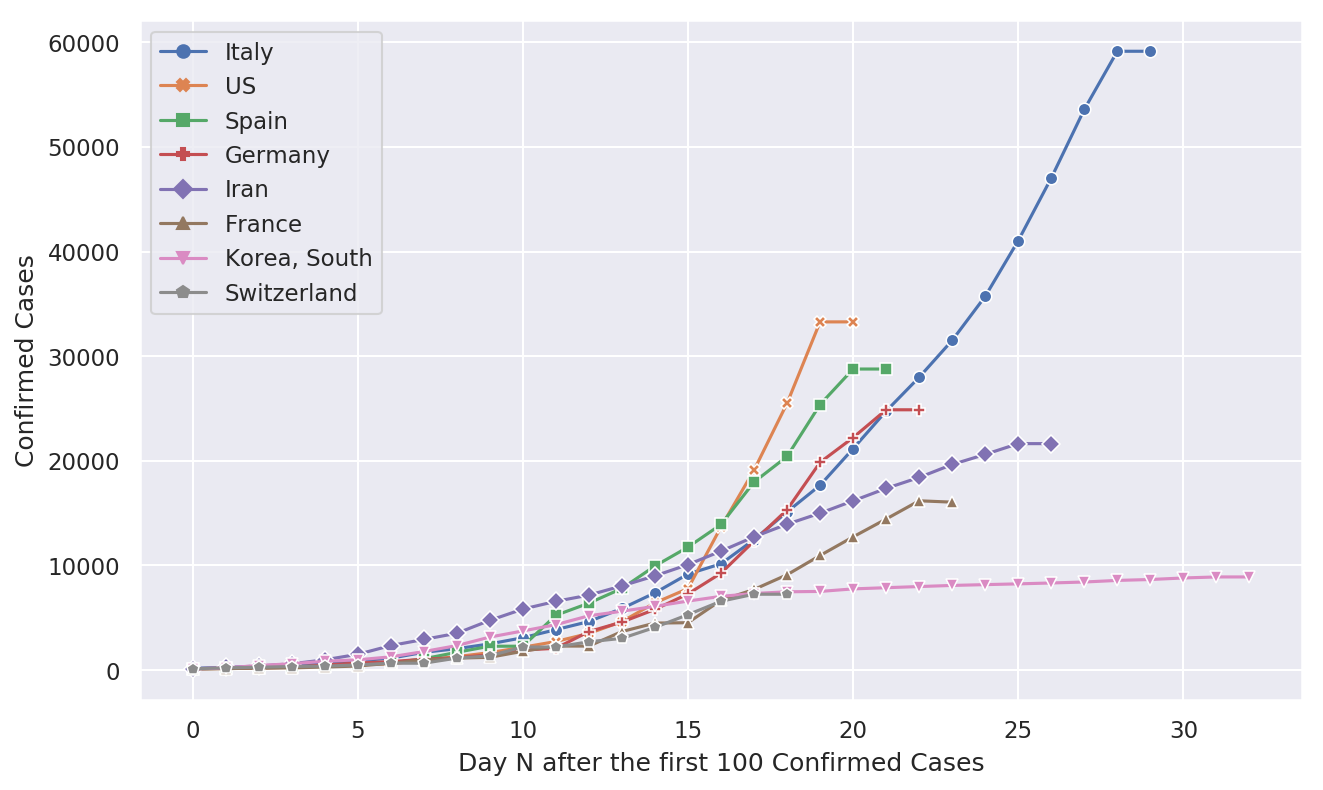

In [164]:
plot_linear(plottable(relative(confirmed_country)))

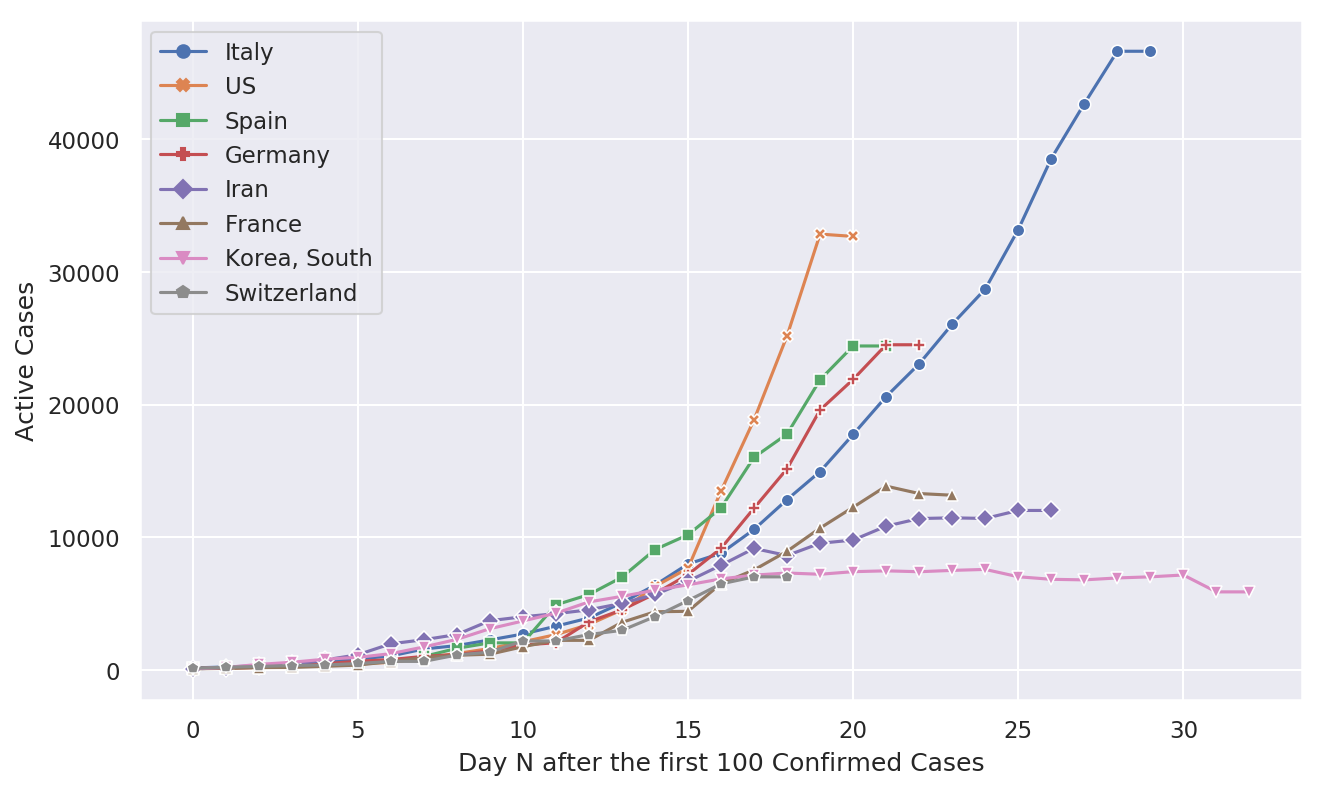

In [165]:
plot_linear(plottable(relative(active_country)), what='Active')

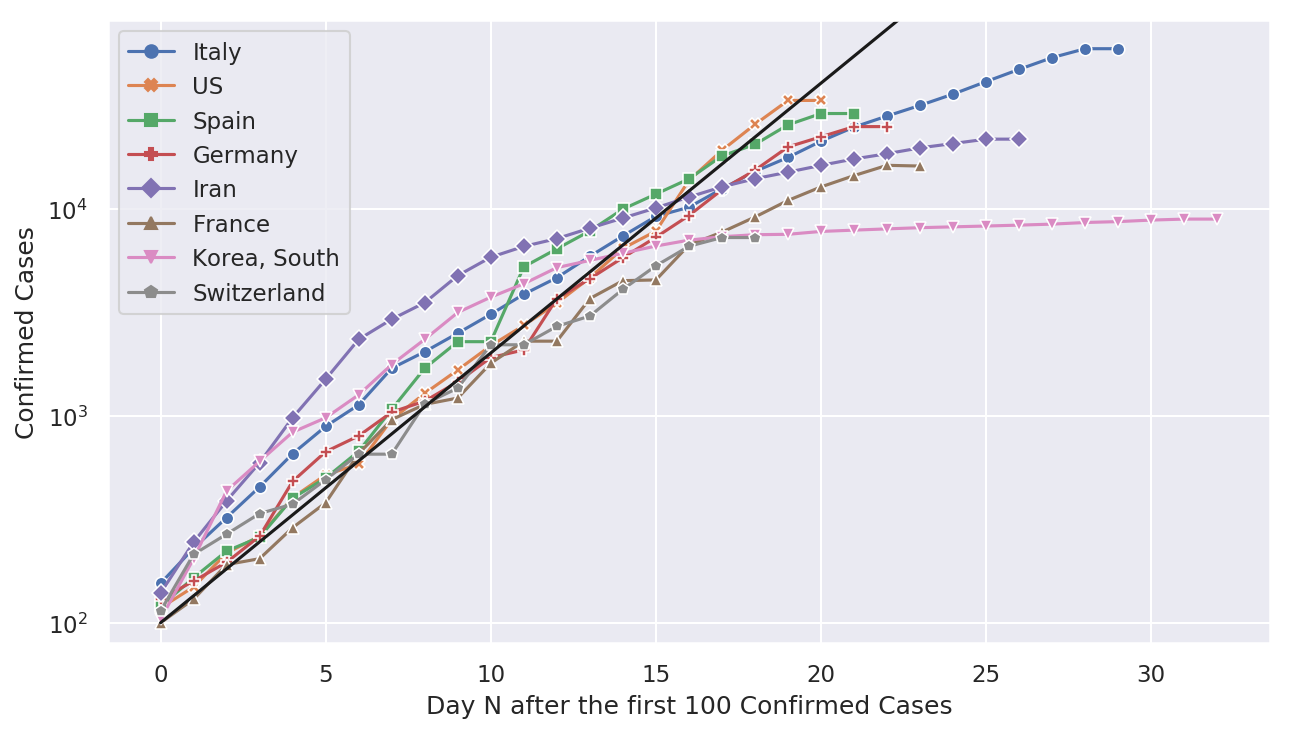

In [166]:
plot_log(plottable(relative(confirmed_country)))

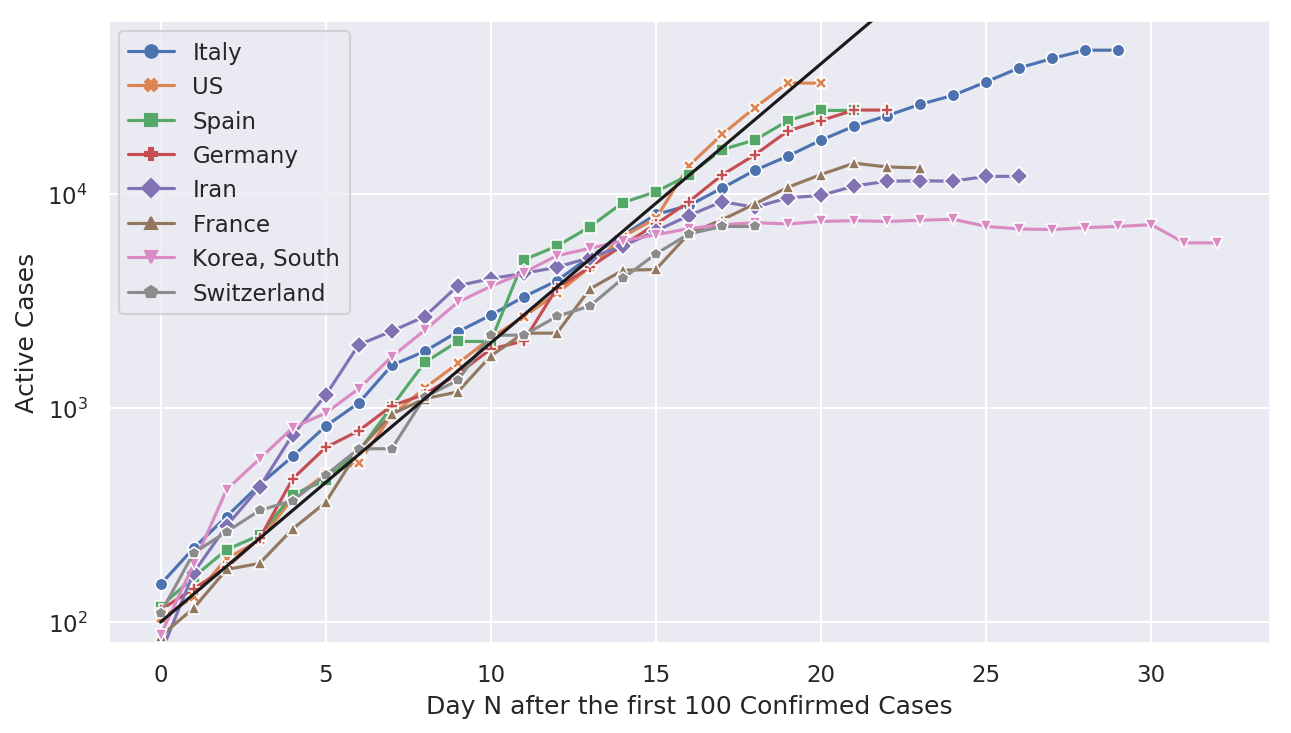

In [167]:
plot_log(plottable(relative(active_country)), what='Active')

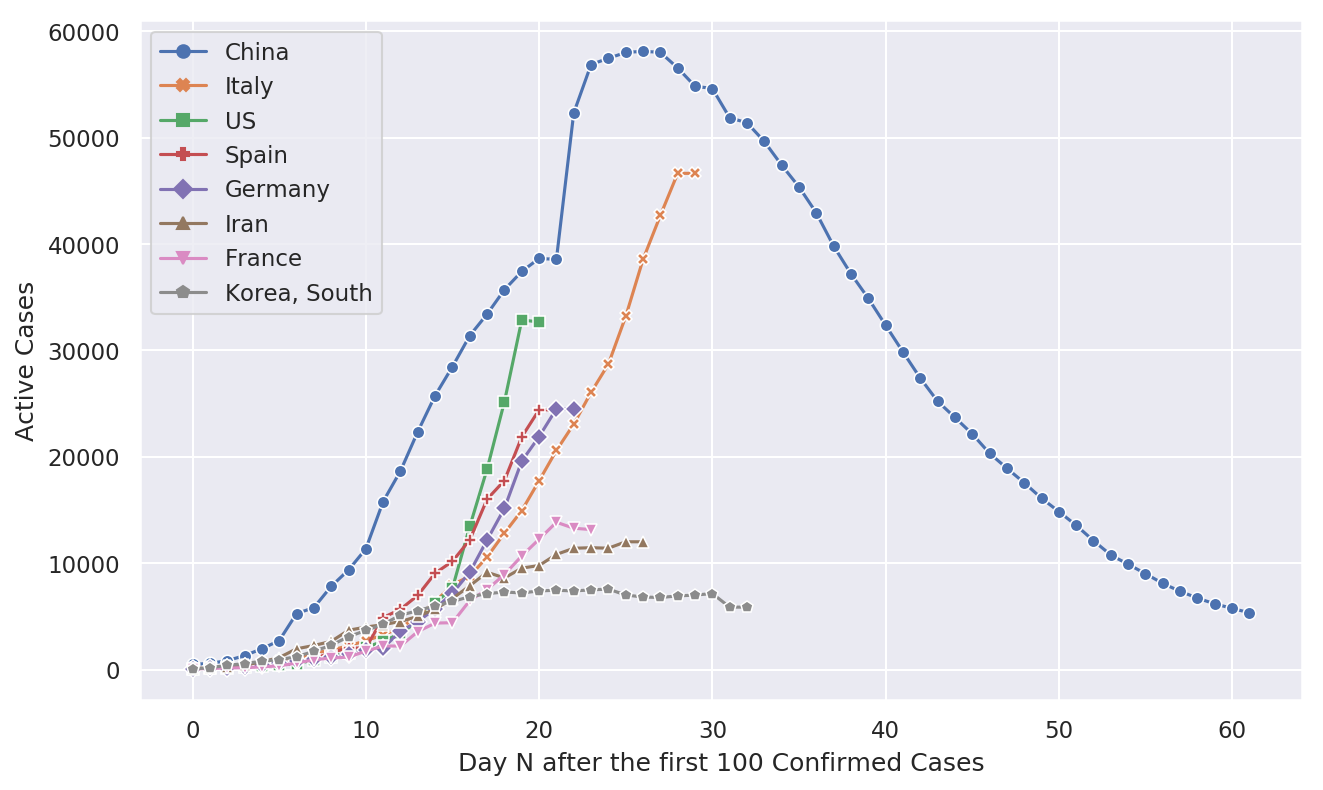

In [168]:
plot_linear(plottable(relative(active_country), countries=['Other']), what='Active')

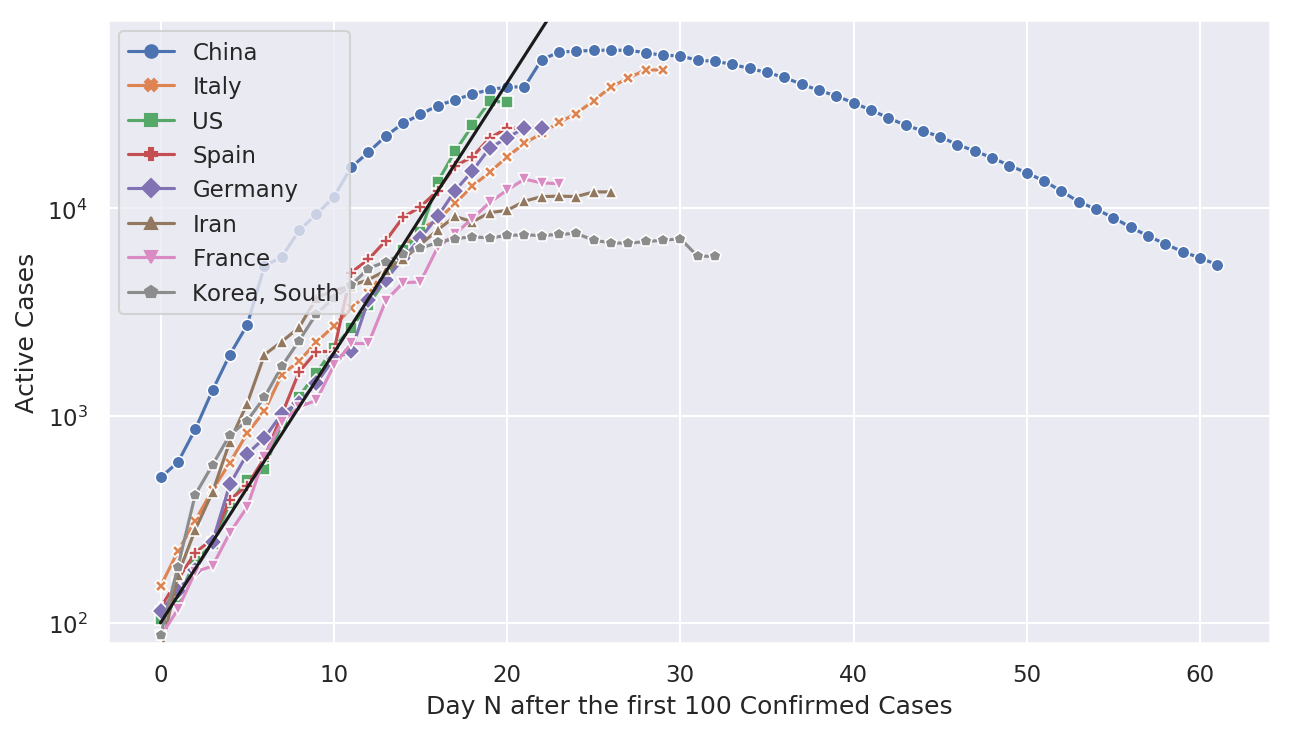

In [169]:
plot_log(plottable(relative(active_country), countries=['Other']), what='Active')

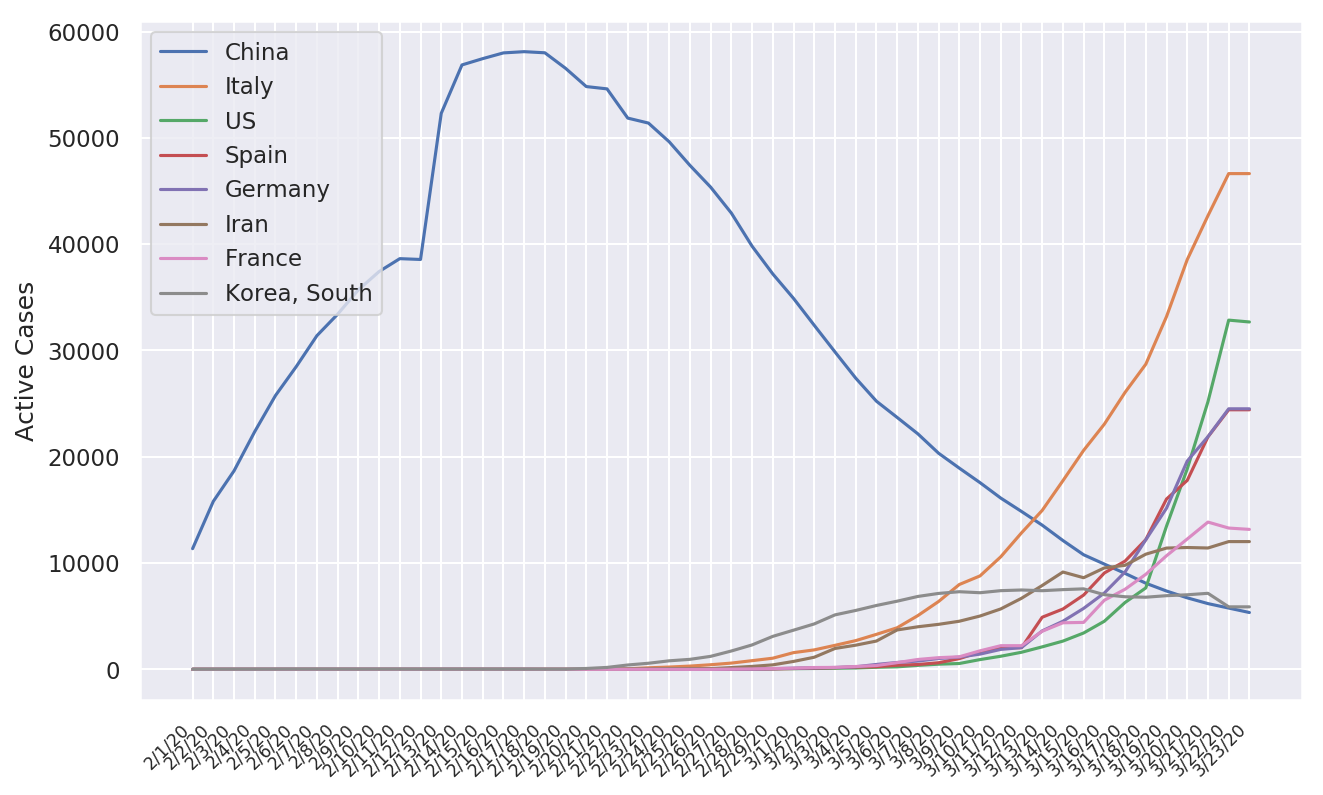

In [170]:
plot_data = plottable(active_country, countries=['Other']).iloc[10:]
what = 'Active'
plot_data = plot_data.reset_index().rename(columns={"index":"day"})
fig, ax = plt.subplots(figsize=(10,6), dpi=150)
plot_data.plot.line(ax=ax, style='-', rot=45, xticks=plot_data.index)
plt.legend(loc='upper left')
offset = OFFSET
ax.set(ylabel=('%s Cases' % what))
ax.set_xticklabels(plot_data["day"], fontsize='x-small', horizontalalignment='right');

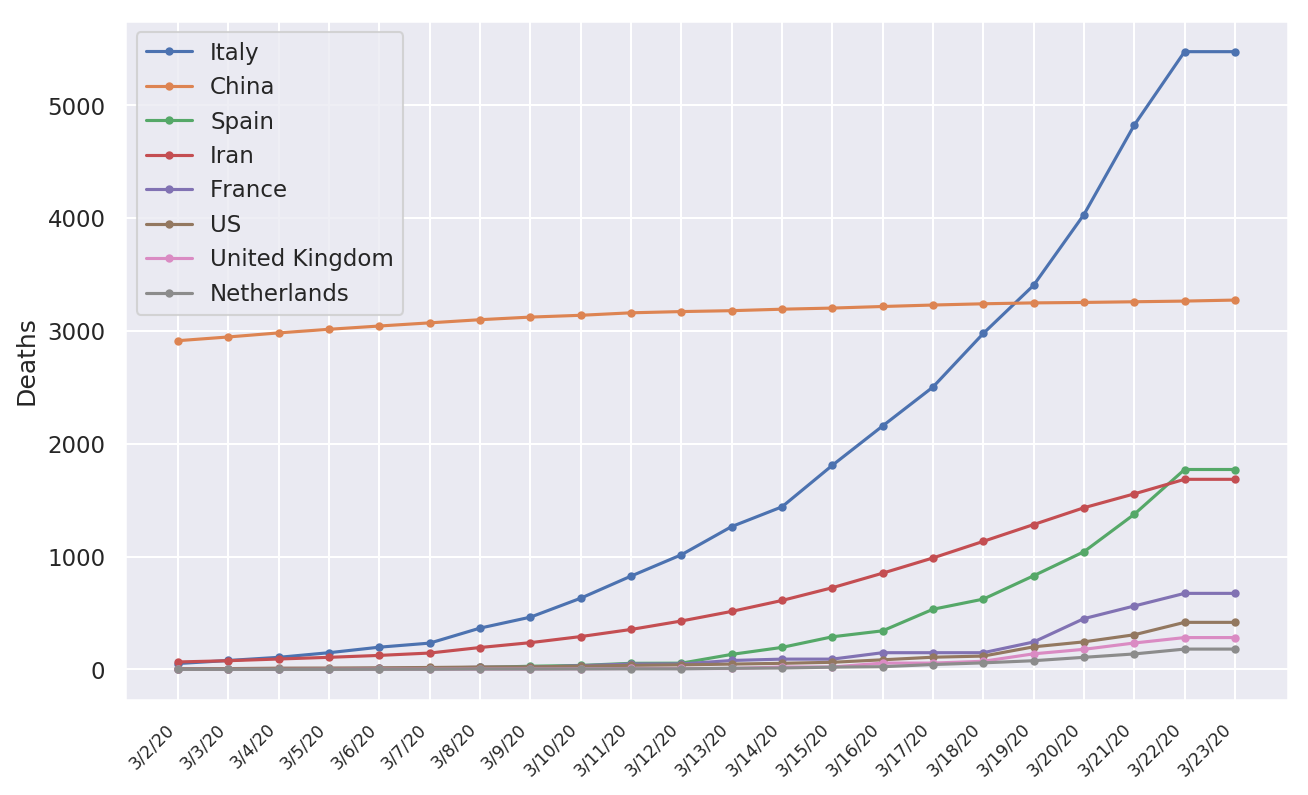

In [171]:
plot_data = plottable(deaths_country, countries=['Other']).iloc[40:]
what = 'Deaths'
plot_data = plot_data.reset_index().rename(columns={"index":"day"})
fig, ax = plt.subplots(figsize=(10,6), dpi=150)
plot_data.plot.line(ax=ax, style='.-', rot=45, xticks=plot_data.index)
plt.legend(loc='upper left')
ax.set(ylabel=('%s' % what))
ax.set_xticklabels(plot_data["day"], fontsize='x-small', horizontalalignment='right');

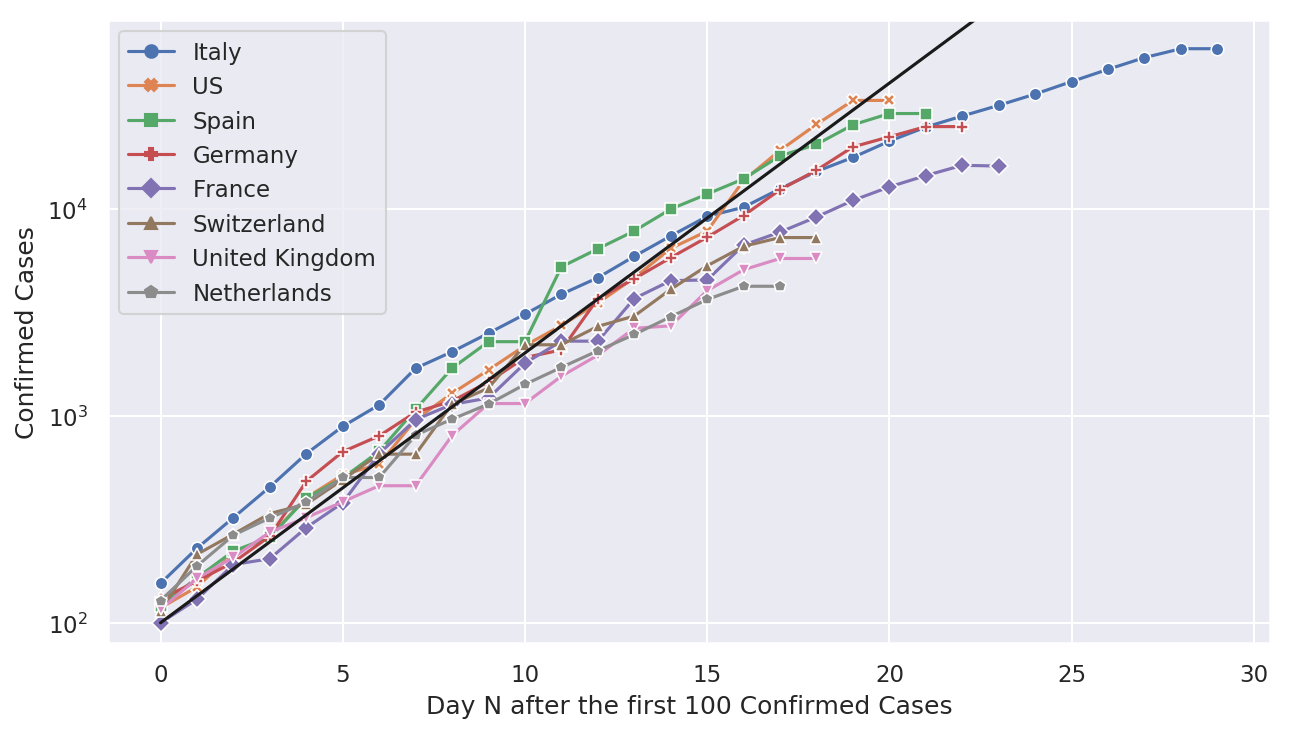

In [172]:
plot_log(plottable(relative(confirmed_country), countries=['China', 'Others', 'Cruise Ship', 'Iran', 'Korea, South']), growth_rate=0.30, offset=100)

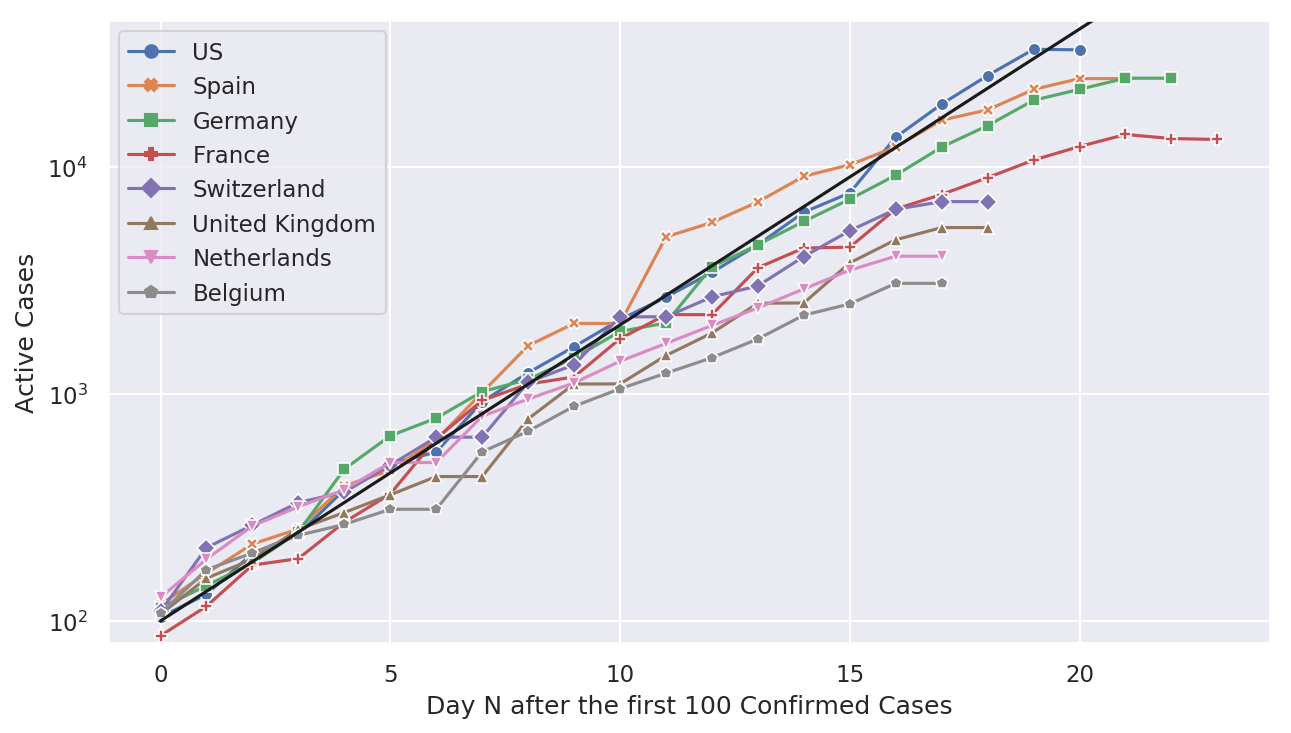

In [173]:
plot_log(plottable(relative(active_country), countries=['China', 'Others', 'Cruise Ship', 'Iran', 'Korea, South', 'Italy']), growth_rate=0.30, offset=100, what='Active')

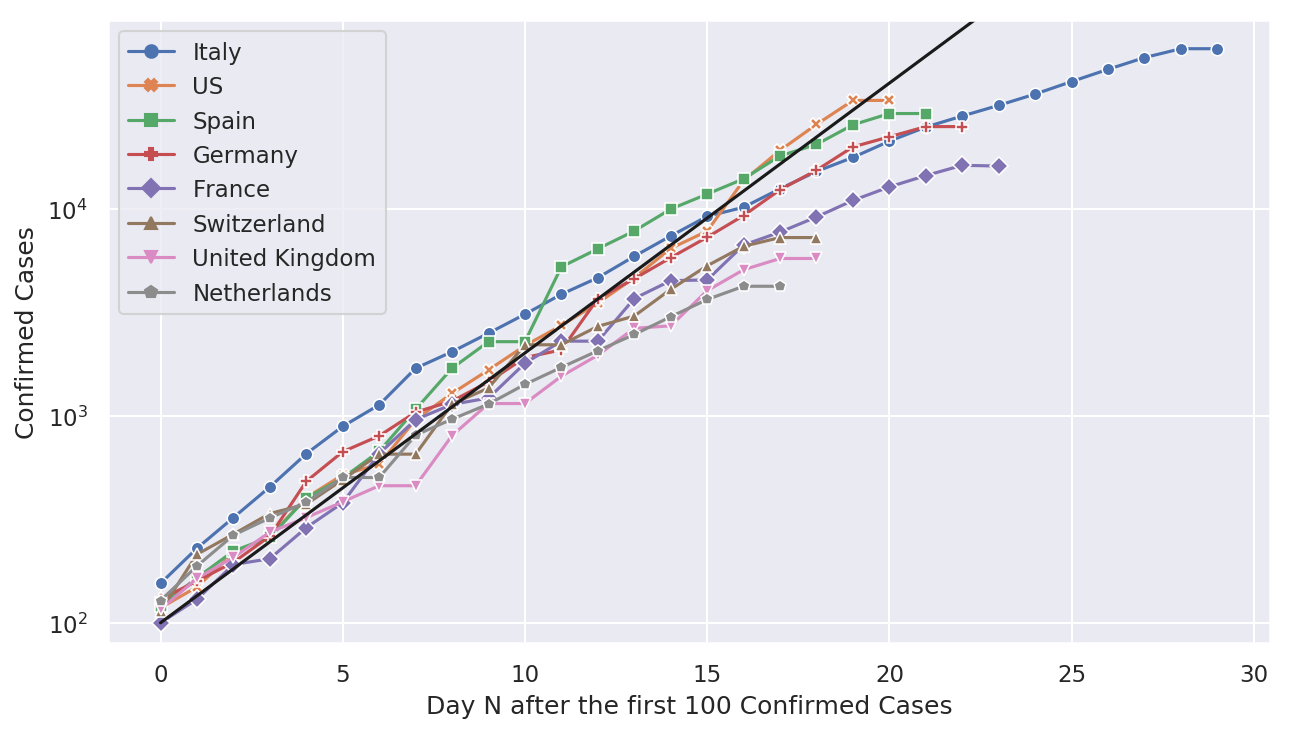

In [174]:
plot_log(plottable(relative(confirmed_country), countries=['China', 'Others', 'Cruise Ship', 'Iran', 'Korea, South']), growth_rate=0.30, offset=100)

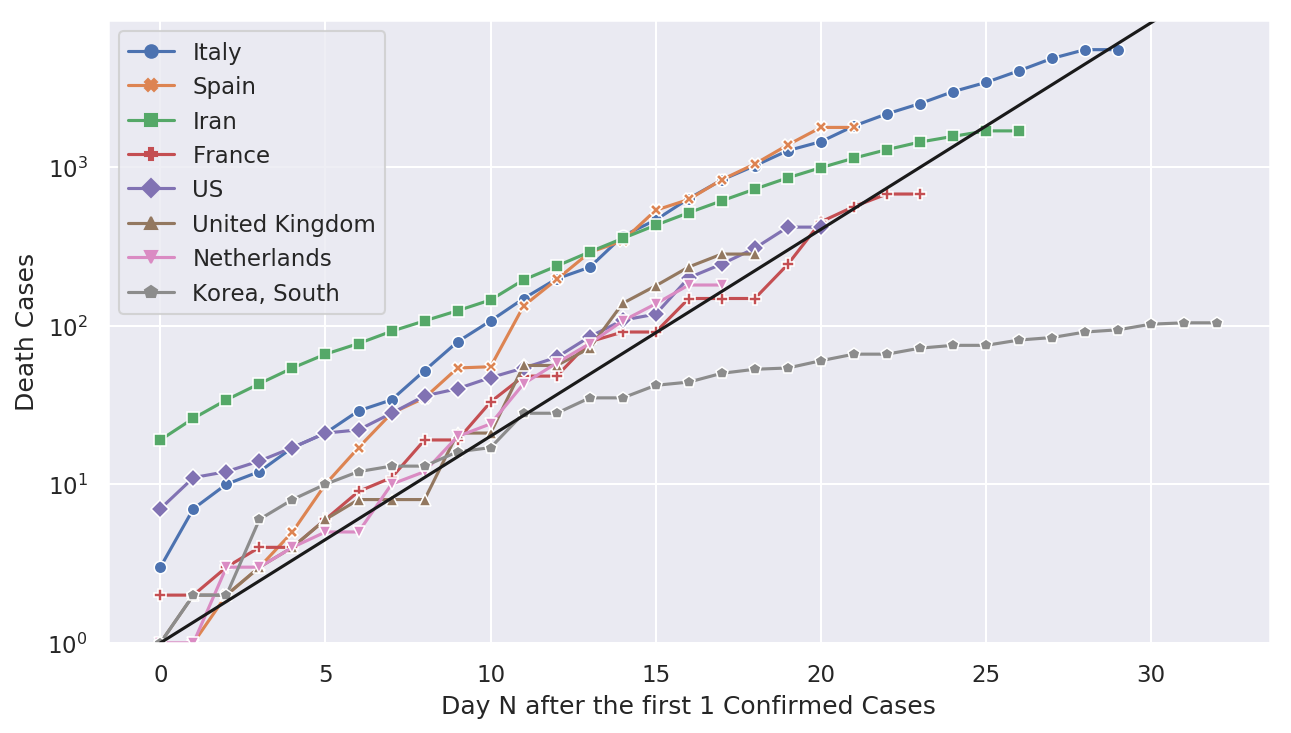

In [175]:
plot_log(plottable(relative(deaths_country)), what='Death', ymin=1, offset=1)

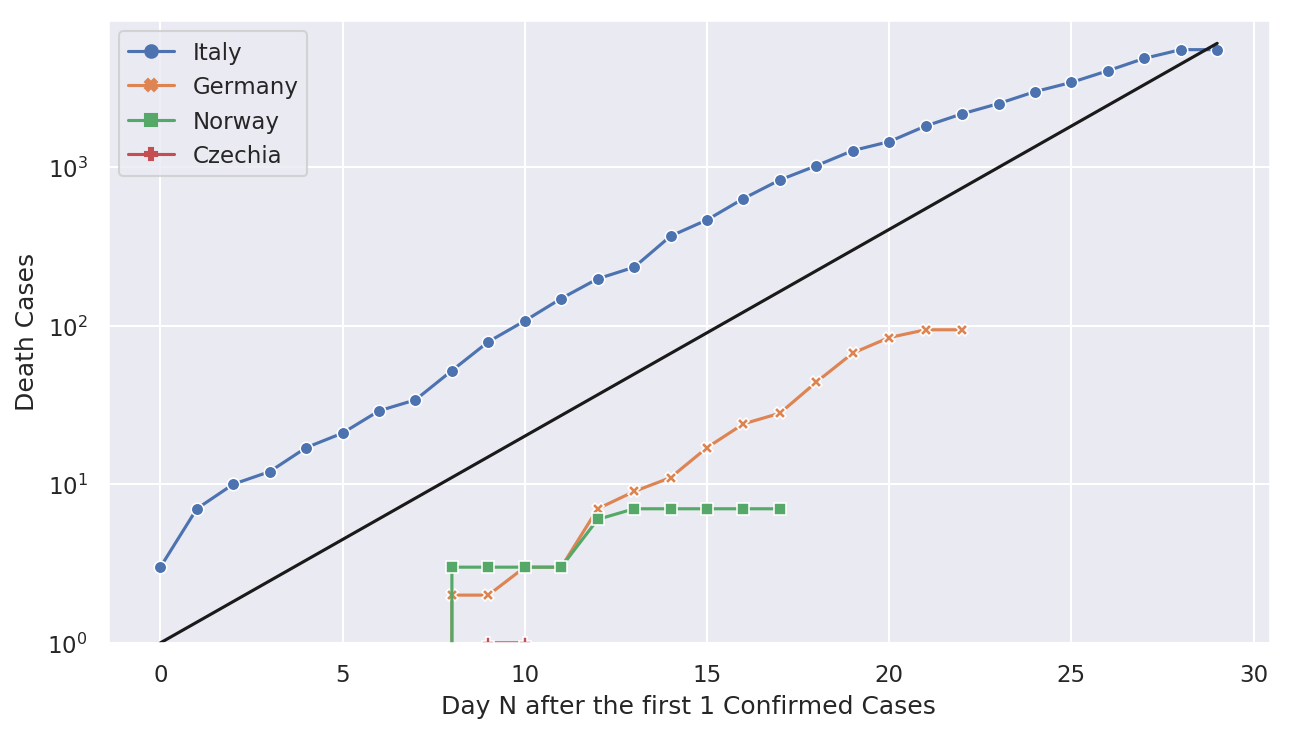

In [176]:
plot_log(plottable(relative(deaths_country), countries=['Czechia', 'Germany', 'Italy', 'Norway'], mode='include'), what='Death', ymin=1, offset=1)

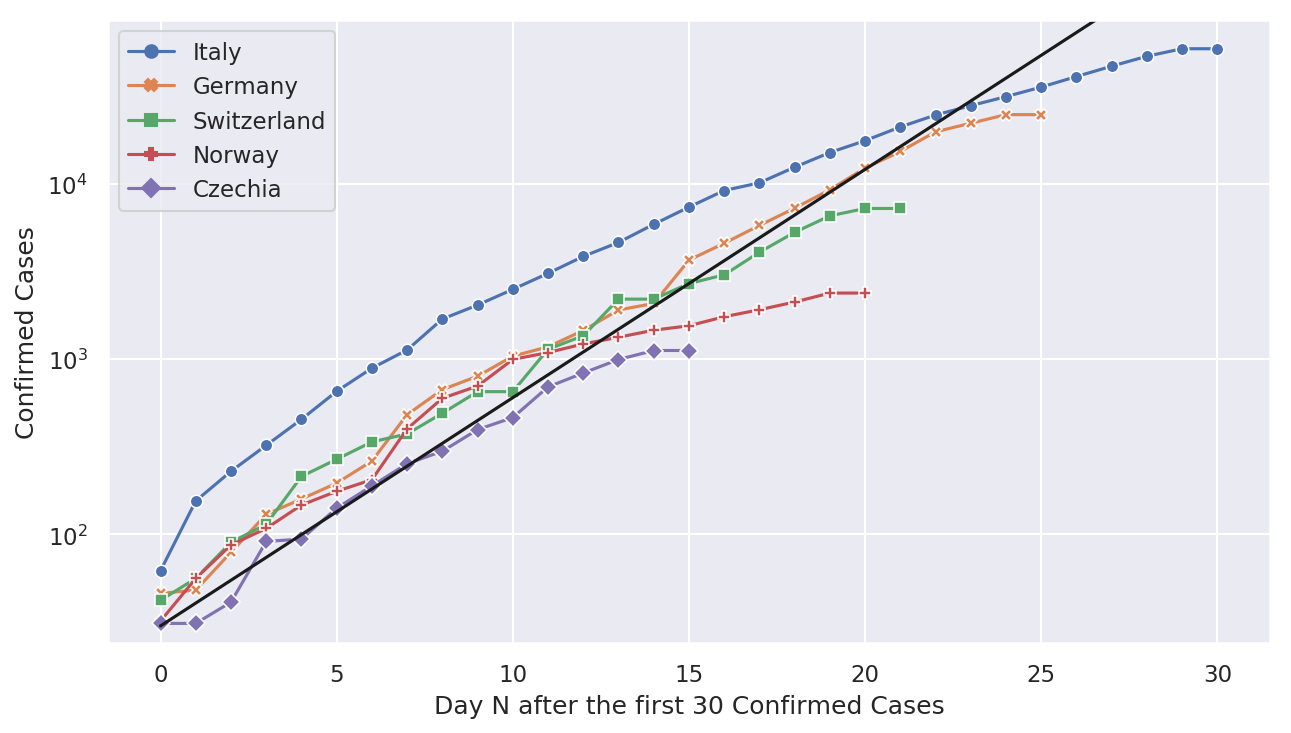

In [177]:
#plot_linear(plottable(relative(confirmed_country, offset=30), countries=['Czechia', 'Germany', 'Italy'], mode='include').head(10), offset=30)
plot_log(plottable(relative(confirmed_country, offset=30), countries=['Czechia', 'Germany', 'Italy', 'Switzerland', 'Norway'], mode='include'), growth_rate=0.30, offset=30)

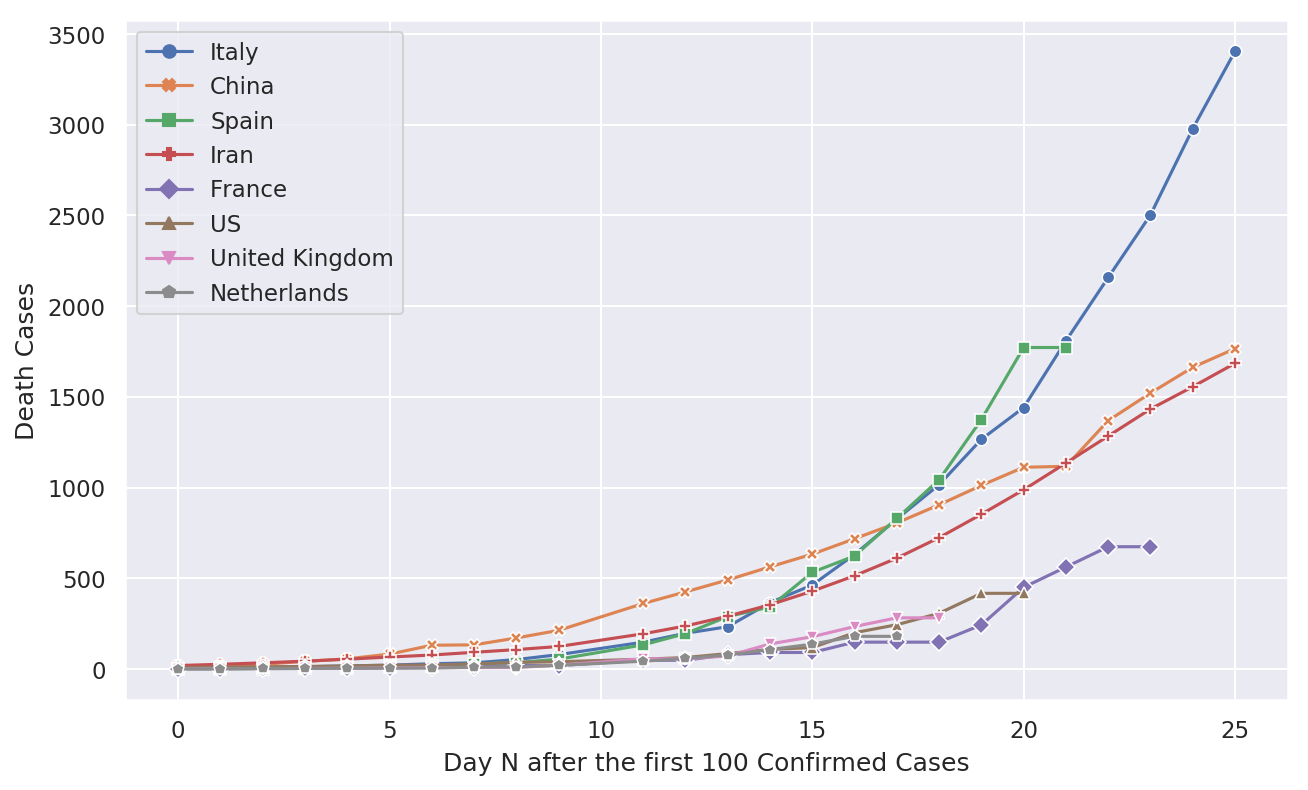

In [178]:
plot_linear(plottable(relative(deaths_country), countries=['Other']).iloc[:25], what='Death')

In [179]:
def fit_range(plt, plot_data, column, start_date, end_date, **kwargs):
  index_start = plot_data[plot_data['day'] == start_date].index.values[0]
  index_end = plot_data[plot_data['day'] == end_date].index.values[0]
  fit_data = plot_data.iloc[index_start:index_end+1]
  [growth_rate, A] = np.polyfit(fit_data[column].index.values, np.log(fit_data[column].values), 1)
  x = np.arange(index_start-2, index_end+3, 1)
  y = np.exp(A)*np.exp(x*growth_rate)
  plt.plot(x, y, **kwargs)
  return growth_rate

Text(25.5,50,'8d after\nquarantine\nT_d=4.9d -> T_d=5.7d')

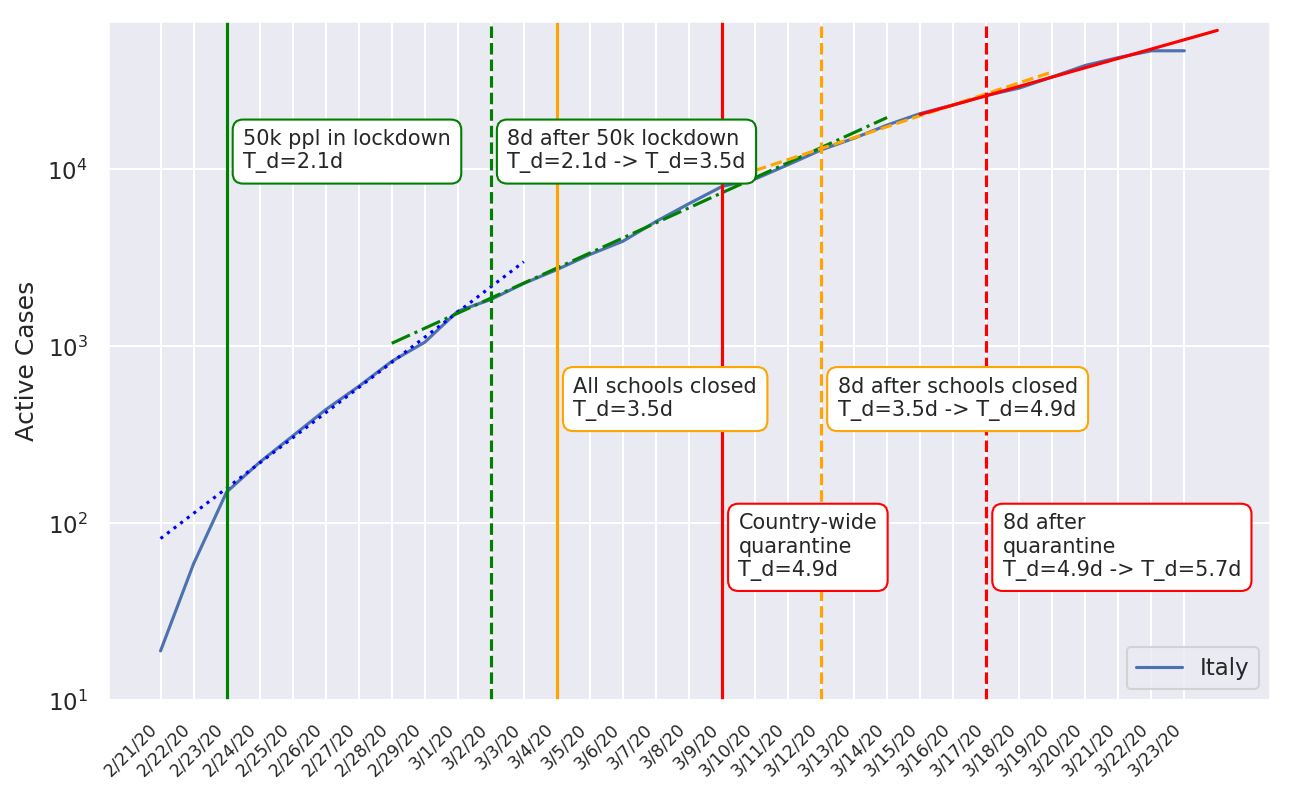

In [183]:
plot_data = plottable(active_country, countries=['Italy'], mode='include').iloc[30:]
what = 'Active'
plot_data = plot_data.reset_index().rename(columns={"index":"day"})
fig, ax = plt.subplots(figsize=(10,6), dpi=150)
plot_data.plot.line(ax=ax, style='-', rot=45, xticks=plot_data.index)
plt.legend(loc='lower right')
ax.set(ylabel=('%s Cases' % what))
ax.set_xticklabels(plot_data["day"], fontsize='x-small', horizontalalignment='right');
ax.set_yscale('log')
ax.set_ylim(bottom=10)

# Feb 23 = 50k ppl in Quarantine
lockdown_rate = fit_range(plt, plot_data, 'Italy', start_date='2/23/20', end_date='3/1/20', linestyle=':', color='blue')

# Mar 4 = Schools closed
school_close_rate = fit_range(plt, plot_data, 'Italy', start_date='3/1/20', end_date='3/12/20', linestyle='-.', color='green')

# Mar 4 = Schools closed
pre_quarantine_rate = fit_range(plt, plot_data, 'Italy', start_date='3/12/20', end_date='3/17/20', linestyle='--', color='orange')

# Mar 4 = Schools closed
quarantine_rate = fit_range(plt, plot_data, 'Italy', start_date='3/17/20', end_date='3/22/20', linestyle='solid', color='red')

ax.axvline(x=2, linestyle='solid', color='green')
ax.text(x=2.5, y=1*10**4, s='50k ppl in lockdown\nT_d=%.1fd' % (math.log(2)/lockdown_rate), fontsize='small', bbox=dict(facecolor='white', edgecolor='green', boxstyle='round,pad=0.5'))
ax.axvline(x=2+8, linestyle='dashed', color='green')
ax.text(x=2.5+8, y=1*10**4, s='8d after 50k lockdown\nT_d=%.1fd -> T_d=%.1fd' % ((math.log(2)/lockdown_rate), (math.log(2)/school_close_rate)), fontsize='small', bbox=dict(facecolor='white', edgecolor='green', boxstyle='round,pad=0.5'))

ax.axvline(x=12, linestyle='solid', color='orange')
ax.text(x=12.5, y=4*10**2, s='All schools closed\nT_d=%.1fd' % (math.log(2)/school_close_rate), fontsize='small', bbox=dict(facecolor='white', edgecolor='orange', boxstyle='round,pad=0.5'))
ax.axvline(x=12+8, linestyle='dashed', color='orange')
ax.text(x=12.5+8, y=4*10**2, s='8d after schools closed\nT_d=%.1fd -> T_d=%.1fd' % ((math.log(2)/school_close_rate), (math.log(2)/pre_quarantine_rate)), fontsize='small', bbox=dict(facecolor='white', edgecolor='orange', boxstyle='round,pad=0.5'))

ax.axvline(x=17, linestyle='solid', color='red')
ax.text(x=17.5, y=5*10**1, s='Country-wide\nquarantine\nT_d=%.1fd' % (math.log(2)/pre_quarantine_rate), fontsize='small', bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.5'))
ax.axvline(x=17+8, linestyle='dashed', color='red')
ax.text(x=17.5+8, y=5*10**1, s='8d after\nquarantine\nT_d=%.1fd -> T_d=%.1fd' % ((math.log(2)/pre_quarantine_rate), (math.log(2)/quarantine_rate)), fontsize='small', bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.5'))

Text(29.5,50,'8d after school\nannouncement\nT_d=2.8d -> T_d=6.2d')

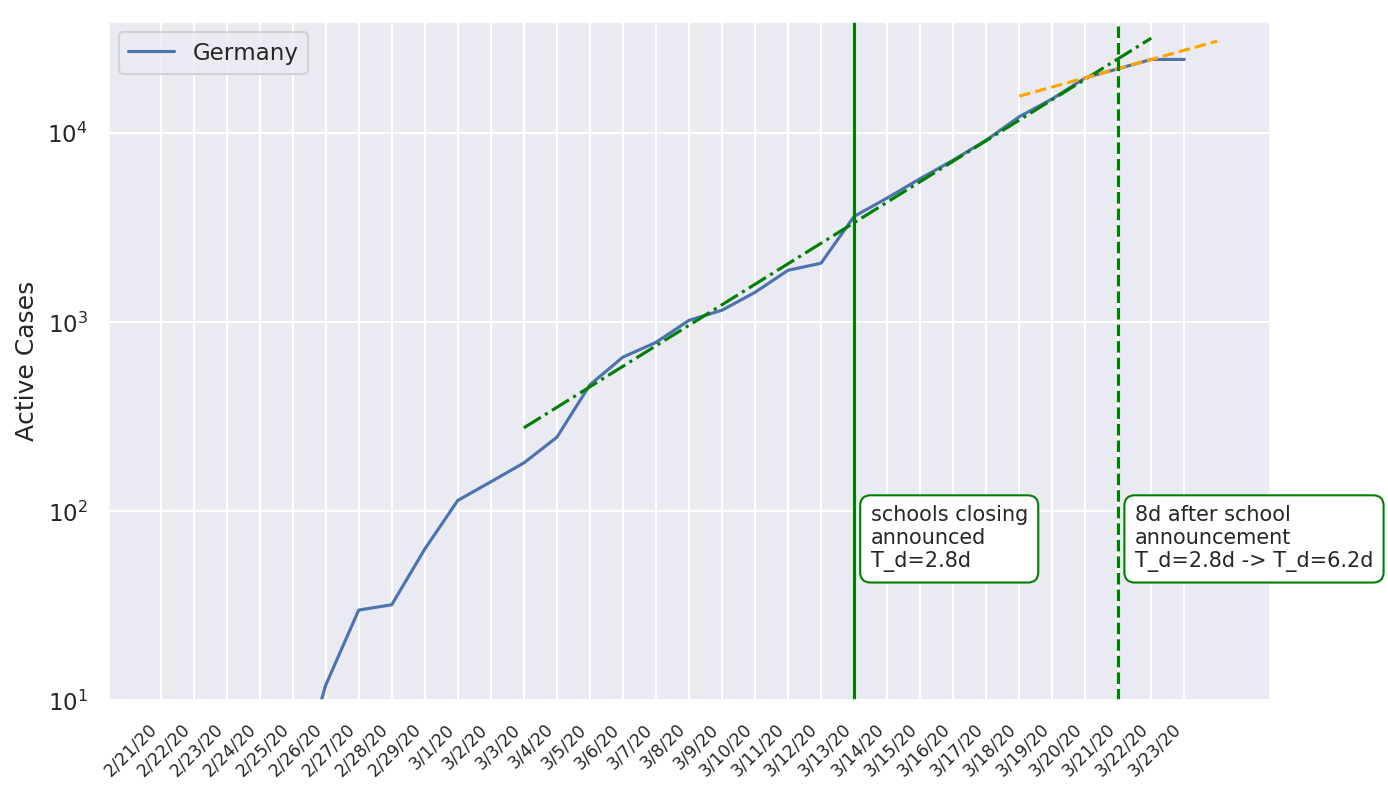

In [187]:
plot_data = plottable(active_country, countries=['Germany'], mode='include').iloc[30:]
what = 'Active'
plot_data = plot_data.reset_index().rename(columns={"index":"day"})
fig, ax = plt.subplots(figsize=(10,6), dpi=150)
plot_data.plot.line(ax=ax, style='-', rot=45, xticks=plot_data.index)
plt.legend(loc='upper left')
ax.set(ylabel=('%s Cases' % what))
ax.set_xticklabels(plot_data["day"], fontsize='x-small', horizontalalignment='right');
ax.set_yscale('log')
ax.set_ylim(bottom=10)

# Feb 23 = 50k ppl in Quarantine
#lockdown_rate = fit_range(plt, plot_data, 'Germany', start_date='2/23/20', end_date='3/1/20', linestyle=':', color='blue')

# Mar 13 = Schools closed announced
# Mar 17 = Schools closed enforced
initial_rate = fit_range(plt, plot_data, 'Germany', start_date='3/5/20', end_date='3/20/20', linestyle='-.', color='green')

# Mar 4 = Schools closed
school_close_rate = fit_range(plt, plot_data, 'Germany', start_date='3/20/20', end_date='3/22/20', linestyle='--', color='orange')

# Mar 4 = Schools closed
#quarantine_rate = fit_range(plt, plot_data, 'Germany', start_date='3/16/20', end_date='3/18/20', linestyle='solid', color='red')

ax.axvline(x=21, linestyle='solid', color='green')
ax.text(x=21.5, y=5*10**1, s='schools closing\nannounced\nT_d=%.1fd' % (math.log(2)/initial_rate), fontsize='small', bbox=dict(facecolor='white', edgecolor='green', boxstyle='round,pad=0.5'))
ax.axvline(x=21+8, linestyle='dashed', color='green')
ax.text(x=21.5+8, y=5*10**1, s='8d after school\nannouncement\nT_d=%.1fd -> T_d=%.1fd' % ((math.log(2)/initial_rate), (math.log(2)/school_close_rate)), fontsize='small', bbox=dict(facecolor='white', edgecolor='green', boxstyle='round,pad=0.5'))

#ax.axvline(x=12, linestyle='solid', color='orange')
#ax.text(x=12.5, y=4*10**2, s='All schools closed\nT_d=%.1fd' % (math.log(2)/school_close_rate), fontsize='small', bbox=dict(facecolor='white', edgecolor='orange', boxstyle='round,pad=0.5'))
#ax.axvline(x=12+8, linestyle='dashed', color='orange')
#ax.text(x=12.5+8, y=4*10**2, s='8d after schools closed\nT_d=%.1fd -> T_d=%.1fd' % ((math.log(2)/school_close_rate), (math.log(2)/pre_quarantine_rate)), fontsize='small', bbox=dict(facecolor='white', edgecolor='orange', boxstyle='round,pad=0.5'))

#ax.axvline(x=17, linestyle='solid', color='red')
#ax.text(x=17.5, y=5*10**1, s='Country-wide quarantine\nT_d=%.1fd' % (math.log(2)/pre_quarantine_rate), fontsize='small', bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.5'))
#ax.axvline(x=17+8, linestyle='dashed', color='red')
#ax.text(x=17.5+8, y=5*10**1, s='8d after quarantine\nT_d=%.1fd -> T_d=%.1fd' % ((math.log(2)/pre_quarantine_rate), (math.log(2)/quarantine_rate)), fontsize='small', bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.5'))